<a href="https://colab.research.google.com/github/CollinsKRutto/healthcare-access-Kenya/blob/main/Kenya%20Healthcare%20access%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the second sheet of the Excel file
file_path = 'Kenya_Healthcare_Regression.xlsx'
df = pd.read_excel(file_path, sheet_name=1)

# Display the first few rows
print(df.head())



           County  Population  Facility-Count
0         MOMBASA     1208333             306
1           KWALE      866820             120
2          KILIFI     1453787             253
3      TANA RIVER      315943              58
4            LAMU      143920              46


In [3]:
# Summary info
print(df.info())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   County          47 non-null     object
 1   Population      47 non-null     int64 
 2   Facility-Count  47 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
County            0
Population        0
Facility-Count    0
dtype: int64


In [7]:
# Example: Renaming columns
df.rename(columns={
    'County Name': 'County',
    'Population 2019': 'Population',
    'Facility-Count': 'Facility_Count'
}, inplace=True)

In [8]:
import statsmodels.api as sm

# Define X and y
X = df['Population']
y = df['Facility_Count']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Show the regression summary
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Facility_Count   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     142.2
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.59e-15
Time:                        12:30:09   Log-Likelihood:                -266.88
No. Observations:                  47   AIC:                             537.8
Df Residuals:                      45   BIC:                             541.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4145     18.804      1.458      0.152     -10.460      65.289
Population     0.0002   1.54e-05     11.925      0.000       0.000       0.000
==============================================================================
Omnibus:                       13.779   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.338
Skew:                           0.986   Prob(JB):                     0.000172
Kurtosis:                       5.228   Cond. No.                     2.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

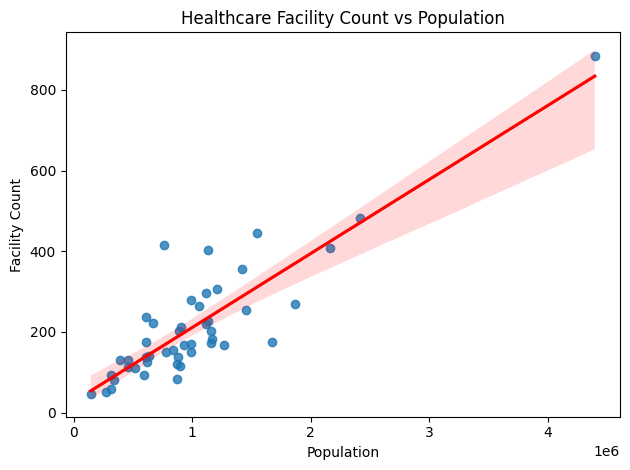

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
sns.regplot(x='Population', y='Facility_Count', data=df, line_kws={"color": "red"})

plt.title('Healthcare Facility Count vs Population')
plt.xlabel('Population')
plt.ylabel('Facility Count')
plt.tight_layout()
plt.show()


In [10]:
# Save the figure
plt.savefig("regression_plot.png")

# Save a simple summary to text
with open('regression_summary.txt', 'w') as f:
    f.write(model.summary().as_text())


<Figure size 640x480 with 0 Axes>